In [33]:
# Import Required Libraries
import pandas as pd # data handling
import numpy as np # numerical opertions
import matplotlib.pyplot as plt # visulaization

In [11]:
# Load the Dataset
data = pd.read_csv("50_Startups.csv")

In [14]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [34]:
# Data Preprocessing
# One Hot Encoding - convert nominal data into meaningful numerical data
# convert state column into dummy variables
# drop_first=True --> avoid dummy variable trap (multiocollinearity)
data = pd.get_dummies(data, dtype=int, drop_first=True)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [16]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [35]:
# Separate Independent and Dependent variables
indep = data[['R&D Spend', 'Administration', 'Marketing Spend',
       'State_Florida', 'State_New York']]  # expenses + state

dep = data[['Profit']] # profit

In [19]:
dep.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


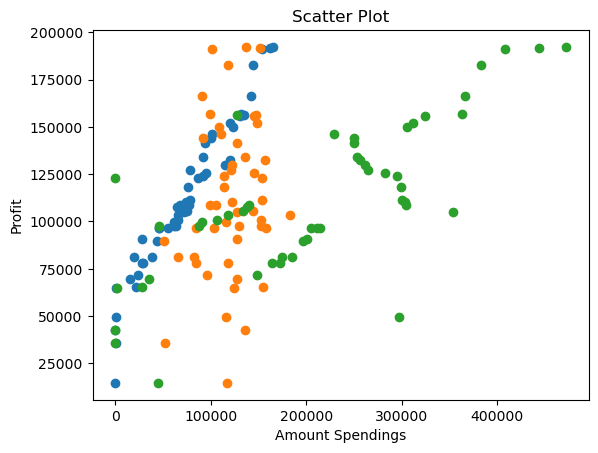

In [27]:
# Data Visulaization - Scatter Plot
# Understand relationship between inputs and profit
# Check linearity assumption
plt.scatter(indep['R&D Spend'], dep)
plt.scatter(indep['Administration'], dep)
plt.scatter(indep['Marketing Spend'], dep)
plt.xlabel("Amount Spendings")
plt.ylabel("Profit")
plt.title("Scatter Plot")
plt.show()

In [21]:
# Train Test Split
# 67% training data
# 33% testing data
# random_state=0 ensures reproducibility
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(indep, dep, test_size=1/3, random_state=0)


In [36]:
# Model Training
# Fits multiple linear regression
# Learns coefficients using least squares method
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# Model Parameters
print("Weight/Slope/Coefficients:", model.coef_) # Coefficients → impact of each feature on profit
print("Bias/Intercept:", model.intercept_) # Intercept → base profit when all features are zero

Weight/Slope/Coefficients: [[ 8.28371991e-01  5.03972419e-02  2.21861926e-02  5.92663381e+03
  -3.38231256e+02]]
Bias/Intercept: [39148.68850233]


In [28]:
# Model Predictions
y_pred = model.predict(x_test) # Predicts profit for unseen data

In [29]:
y_pred

array([[111616.64259451],
       [132709.39466316],
       [140155.11033793],
       [ 76099.20398184],
       [186329.94240372],
       [112822.19807255],
       [ 63002.00394804],
       [ 99107.10428091],
       [119287.75473383],
       [175522.83864739],
       [101000.698615  ],
       [ 85772.99293235],
       [117713.76481525],
       [ 90230.88085201],
       [133375.04389452],
       [167530.54765828],
       [158013.54602063]])

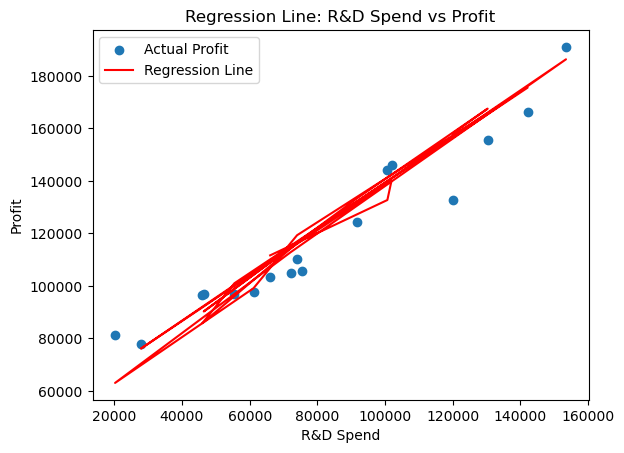

In [40]:
# Visualizing Regression Line using R&D Spend (Most Influential Feature)
x_test_rd = x_test[['R&D Spend']]
y_pred = model.predict(x_test)

# Scatter Plot - actual value
plt.scatter(x_test_rd, y_test, label="Actual Profit")

# Regression line (Predicted values)
plt.plot(x_test_rd, y_pred, label="Regression Line", color='red')

plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Regression Line: R&D Spend vs Profit")
plt.legend()
plt.show()

In [37]:
# Model Evaluations
# R² score → how well model explains variance in profit
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) # Value close to 1 = good model
print("R^2 score: ", r2)

R^2 score:  0.8752655285748308


In [38]:
# Save the Model
# Saves trained model for deployment
# Can be reused without retraining
import pickle
filename = "profit_prediction_model_mlr.pkl"
pickle.dump(model, open(filename, 'wb'))